In [0]:
from sklearn.datasets import load_iris

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import model_selection

In [0]:
dataset=load_iris()
data=pd.DataFrame(dataset['data'],columns=['Petal length','Petal Width','Sepal Length','Sepal Width'])
data['Species']=dataset['target']
data['Species']=data['Species'].apply(lambda x: dataset['target_names'][x])

In [5]:
data.head()

,Petal length,Petal Width,Sepal Length,Sepal Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
X = data.iloc[:,0:4]
Y = data.iloc[:,4]

In [0]:
validation_size = 0.50
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [0]:
seed = 7
scoring = 'accuracy'

In [0]:
models = []

models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))


In [12]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

KNN: 0.946429 (0.065854)
CART: 0.973214 (0.053720)


In [0]:
from sklearn.metrics import matthews_corrcoef,accuracy_score,classification_report,confusion_matrix

In [14]:
knn = DecisionTreeClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(matthews_corrcoef(Y_validation, predictions))

0.9466666666666667
[[25  0  0]
 [ 0 23  2]
 [ 0  2 23]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.92      0.92      0.92        25
   virginica       0.92      0.92      0.92        25

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

0.92


In [15]:
nn = KNeighborsClassifier()
nn.fit(X_train, Y_train)
predictions = nn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(matthews_corrcoef(Y_validation, predictions))

0.9466666666666667
[[25  0  0]
 [ 0 24  1]
 [ 0  3 22]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.89      0.96      0.92        25
   virginica       0.96      0.88      0.92        25

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75

0.9209829062632353


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
rnn = RandomForestClassifier()
rnn.fit(X_train, Y_train)
predictions = rnn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(matthews_corrcoef(Y_validation, predictions))

0.9333333333333333
[[25  0  0]
 [ 0 23  2]
 [ 0  3 22]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        25
  versicolor       0.88      0.92      0.90        25
   virginica       0.92      0.88      0.90        25

    accuracy                           0.93        75
   macro avg       0.93      0.93      0.93        75
weighted avg       0.93      0.93      0.93        75

0.9002400960426865


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [18]:
!pip install forestci

     |████████████████████████████████| 163kB 7.2MB/s 


In [19]:
!pip install duecredit

     |████████████████████████████████| 71kB 3.5MB/s 
     |████████████████████████████████| 163kB 13.7MB/s 
  Created wheel for duecredit: filename=duecredit-0.7.0-cp36-none-any.whl size=74556 sha256=6a5684c2322155fc86ea8ce2ec02ebd9e5ed7097f80464859e4cbab0f5309ca8
  Stored in directory: /root/.cache/pip/wheels/50/00/9b/4d562fc3dbd184fa68ffc9dfdbc57b5c83e9bcfd8cf4b6a042
Successfully built duecredit


In [0]:
import forestci as fci

In [0]:
spam_V_IJ_unbiased = fci.random_forest_error(rnn, X_train,
X_validation)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

UFuncTypeError: ignored

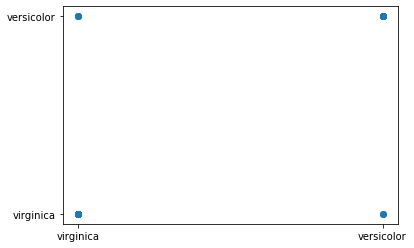

In [27]:
plt.errorbar( Y_validation, predictions, yerr=spam_V_IJ_unbiased, fmt='o')
plt.plot([5, 45], [5, 45], 'k--')
plt.xlabel('Reported MPG')
plt.ylabel('Predicted MPG')
plt.show()